# Darknet Economics - Sellers - Data Processing and Feature Engineering

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import re
import utils
from bs4 import BeautifulSoup

import nltk

from datetime import datetime

ModuleNotFoundError: No module named 'utils'

In [ ]:
sellers16 = pd.read_csv('data/DreamMarket2016_seller.csv')
sellers17 = pd.read_csv('data/DreamMarket2017_seller.csv')

## User-defined Functions

In [22]:
def convert_str_to_float(string):
    '''
    Transforms a string to a float.
    If string can
    
    Args:
        string (str) : Price is expected to start w/ a "$".
    
    Returns:
        adj_price (float) : Float object to be used for calculations/modelinng.
    
    '''

    try:
        
        if string.isnumeric():
            num_val = string
        
        else:
            tmp = re.sub(r'[^0-9.]', '', string)
            num_val = float(tmp)
                     
    except:
        num_val = np.NaN
    
    return num_val

def calc_days_delta_for_strings(start_date, baseline_date):
    '''
    Transforms a string to a datetime object to calc number of days passed.
    
    Args:
        start_date (str) : day-month-year format
        baseline_date (str) : day-month-year format
    Returns:
        num_days (int) : Number of days 
    '''
    start_dt = datetime.strptime(start_date, '%d/%m/%Y')
    baseline_dt = datetime.strptime(baseline_date, '%d/%m/%Y')
    delta = baseline_dt - start_dt
    num_days = delta.days
    return num_days

## Raw Data

### 2016

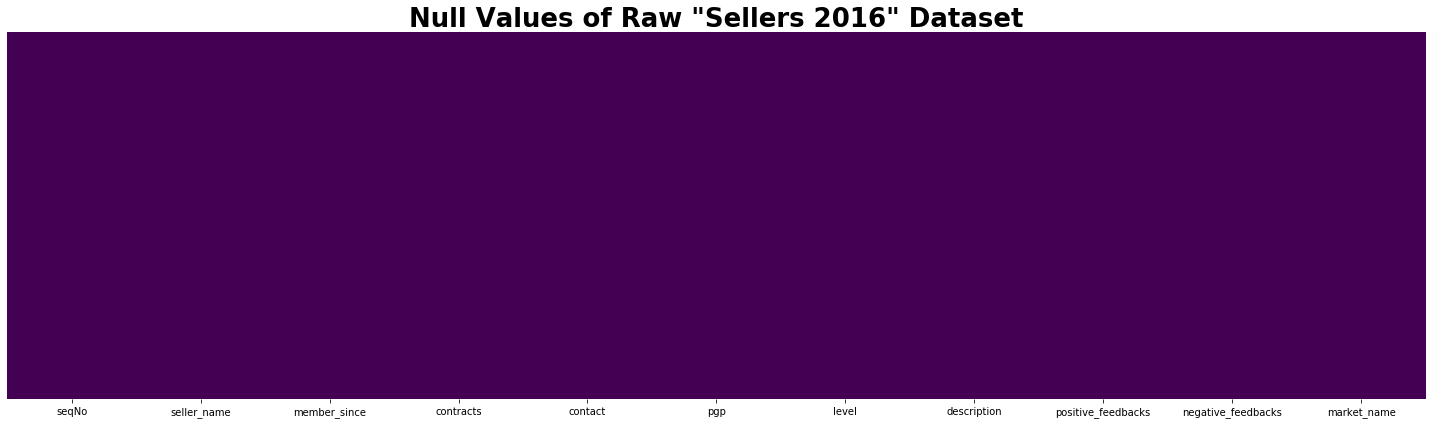

In [13]:
utils.plot_null_val_heatmap(sellers16, 'Null Values of Raw "Sellers 2016" Dataset', (20,6))

In [14]:
sellers16.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   seqNo               690 non-null    int64 
 1   seller_name         690 non-null    object
 2   member_since        690 non-null    object
 3   contracts           690 non-null    object
 4   contact             690 non-null    object
 5   pgp                 690 non-null    object
 6   level               690 non-null    object
 7   description         690 non-null    object
 8   positive_feedbacks  690 non-null    object
 9   negative_feedbacks  690 non-null    object
 10  market_name         690 non-null    object
dtypes: int64(1), object(10)
memory usage: 59.4+ KB


In [15]:
sellers16.head()

,seqNo,seller_name,member_since,contracts,contact,pgp,level,description,positive_feedbacks,negative_feedbacks,market_name
0,1,0ldamsterdam,13/07/2016,-,-,-----BEGIN PGP PUBLIC KEY BLOCK-----\nVersion:...,-,\n-.-.-.-. OLDAMSTERDAM -.-.-.-.\n\nwe ship on...,4.83,-,Dream
1,2,2good4DN,09/05/2016,-,-,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQENBF...,-,\nWe are determined to offer even better produ...,4.76,-,Dream
2,3,420BLAZEUP,19/09/2016,-,-,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQINBF...,-,\n 420BLAZEUP \n\nWE ARE HE...,4.88,-,Dream
3,4,420BooBooKittyfk69,12/07/2016,-,-,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQINBF...,-,"\nRunning low on stock, if u are interested in...",4.85,-,Dream
4,5,ACAB2016,15/07/2016,-,-,-----BEGIN PGP PUBLIC KEY BLOCK-----\n\nmQENBF...,-,"\nHello, we are up and running again. We can d...",4.6Â,-,Dream


In [16]:
cols_to_review = ['contracts', 'contact', 'level', 'negative_feedbacks', 'market_name']
for col in cols_to_review:
    print(sellers16[col].unique())

sellers16_v2 = sellers16.drop(cols_to_review, axis=1)

['-']
['-']
['-']
['-']
['Dream']


In [17]:
sellers16_v2['feedback_cleaned'] = sellers16_v2['positive_feedbacks'].apply(lambda x: convert_str_to_float(x))


In [20]:
type(sellers16_v2.iloc[0,3])

str

In [24]:
baseline_date_16 = '01/01/2017'

sellers16_v2['num_days_member'] = sellers16_v2['member_since'].apply(lambda x: calc_days_delta_for_strings(x, baseline_date_16))

---
## Cleaning 2017 Data

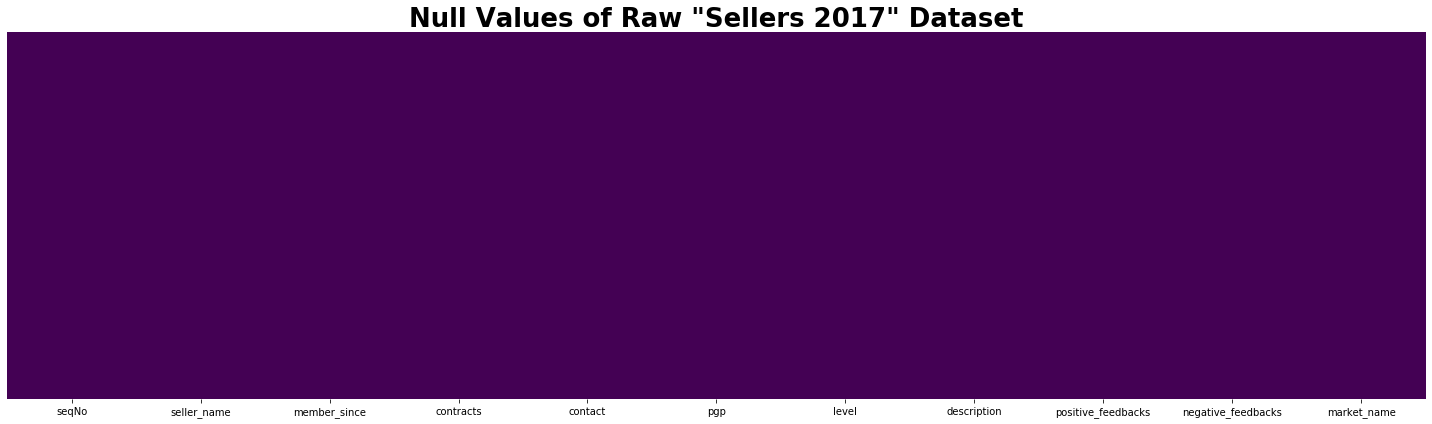

In [26]:
utils.plot_null_val_heatmap(sellers17, 'Null Values of Raw "Sellers 2017" Dataset', (20,6))

In [28]:
cols_to_review = ['contracts', 'contact', 'level', 'negative_feedbacks', 'market_name']
for col in cols_to_review:
    print(sellers17[col].unique())
    
sellers17_v2 = sellers17.drop(cols_to_review, axis=1)

['-']
['-']
['-']
['-']
['Dream']


In [29]:
sellers17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2092 entries, 0 to 2091
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   seqNo               2092 non-null   int64 
 1   seller_name         2092 non-null   object
 2   member_since        2092 non-null   object
 3   contracts           2092 non-null   object
 4   contact             2092 non-null   object
 5   pgp                 2092 non-null   object
 6   level               2092 non-null   object
 7   description         2092 non-null   object
 8   positive_feedbacks  2092 non-null   object
 9   negative_feedbacks  2092 non-null   object
 10  market_name         2092 non-null   object
dtypes: int64(1), object(10)
memory usage: 179.9+ KB


In [30]:
cols_to_review = ['contracts', 'contact', 'level', 'negative_feedbacks', 'market_name']
for col in cols_to_review:
    print(sellers17[col].unique())
    
sellers17_v2 = sellers17.drop(cols_to_review, axis=1)

['-']
['-']
['-']
['-']
['Dream']


In [31]:
sellers17_v2['feedback_cleaned'] = sellers17_v2['positive_feedbacks'].apply(lambda x: convert_str_to_float(x))

In [32]:
baseline_date_17 = '01/01/2018'
sellers17_v2['num_days_member'] = sellers17_v2['member_since'].apply(lambda x: calc_days_delta_for_strings(x, baseline_date_17))

---
## EDA

In [16]:
ratings16 = sellers16_v2['feedback_cleaned']
ratings17 = sellers17_v2['feedback_cleaned']

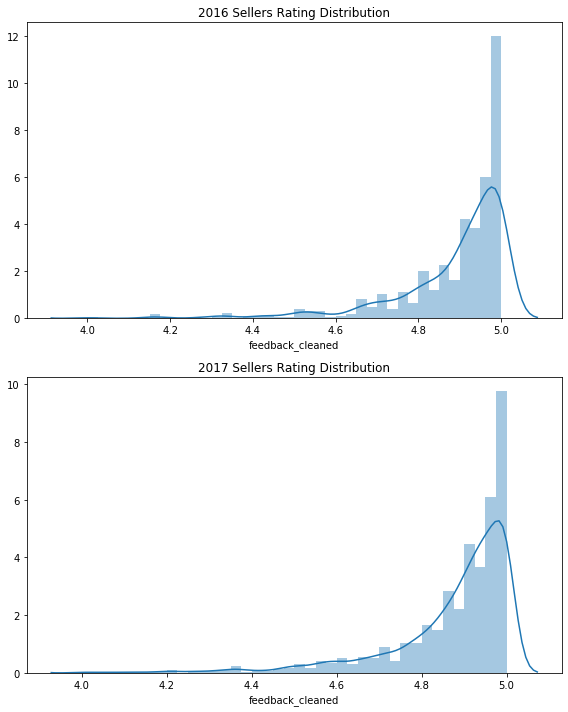

In [17]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

sns.distplot(ratings16, bins= 40, ax=ax1)
ax1.set_title('2016 Sellers Rating Distribution')

sns.distplot(ratings17, bins= 40, ax=ax2)
ax2.set_title('2017 Sellers Rating Distribution')

plt.tight_layout();

In [18]:
summary_titles = ['2016 Seller Ratings', '2017 Seller Ratings']
ratings_arr = [ratings16, ratings17]

for title, rating in zip (summary_titles, ratings_arr):
    print(title)
    print(utils.stats_summary(rating))
    print('\n')

2016 Seller Ratings
STATS SUMMARY:
Mean:  4.887202898550716
Median:  4.93
Std. Dev.:  0.14308797213943833
Max value:  5.0
Min value:  4.0
# of Obs.:  690
None


2017 Seller Ratings
STATS SUMMARY:
Mean:  4.873230535894822
Median:  4.92
Std. Dev.:  0.15112302062387659
Max value:  5.0
Min value:  4.0
# of Obs.:  2092
None




## Seller Overlap

In [19]:
unique_sellers16 = sellers16_v2['seller_name']
unique_sellers17 = sellers17_v2['seller_name']

In [20]:
print('# - Unique Sellers in 2016: ', len(unique_sellers16))
print('# - Unique Sellers in 2017: ', len(unique_sellers17))

# - Unique Sellers in 2016:  690
# - Unique Sellers in 2017:  2092


In [21]:
sellers_in_16_and_17 = pd.Series(list(set(unique_sellers16).intersection(set(unique_sellers17))))
print('# - Sellers in BOTH 2016 and 2017: ', len(sellers_in_16_and_17))

# - Sellers in BOTH 2016 and 2017:  299


In [22]:
sellers16_v2.columns

Index(['seqNo', 'seller_name', 'member_since', 'pgp', 'description',
       'positive_feedbacks', 'feedback_cleaned'],
      dtype='object')

In [23]:
sellers_intersect_df = pd.DataFrame()
sellers_intersect_df['name'] = sellers_in_16_and_17

cols_to_drop = ['seqNo', 'seller_name', 'member_since', 'pgp', 'description', 'feedback_cleaned']

# merge 2016
sellers_intersect_df = pd.merge(sellers_intersect_df, sellers16_v2, how='inner', left_on='name', right_on='seller_name')
sellers_intersect_df.drop(cols_to_drop, axis=1, inplace=True)
sellers_intersect_df.rename({'positive_feedbacks' : '2016_rating'}, axis=1, inplace=True)
sellers_intersect_df['2016_rating'] = sellers_intersect_df['2016_rating'].apply(lambda x: convert_str_to_float(x))

# merge 2017
sellers_intersect_df = pd.merge(sellers_intersect_df, sellers17_v2, how='inner', left_on='name', right_on='seller_name')
sellers_intersect_df.drop(cols_to_drop, axis=1, inplace=True)
sellers_intersect_df.rename({'positive_feedbacks' : '2017_rating'}, axis=1, inplace=True)
sellers_intersect_df['2017_rating'] = sellers_intersect_df['2017_rating'].apply(lambda x: convert_str_to_float(x))

# Add features
sellers_intersect_df['YoY_change'] = sellers_intersect_df['2017_rating'] - sellers_intersect_df['2016_rating']
sellers_intersect_df['YoY_change_prcnt'] = sellers_intersect_df['YoY_change'] / sellers_intersect_df['2016_rating']

In [24]:
sellers_intersect_df.head(10)

,name,2016_rating,2017_rating,YoY_change,YoY_change_prcnt
0,SROG,4.93,4.94,0.01,0.002028
1,Hackyboy,4.93,4.87,-0.06,-0.012170
2,NeymarJunior,5.00,4.80,-0.20,-0.040000
3,thejustifier,4.95,4.93,-0.02,-0.004040
4,EuroPills,4.95,4.95,0.00,0.000000
5,factoryfloor,5.00,4.98,-0.02,-0.004000
6,FlavourStop,4.88,4.91,0.03,0.006148
7,GreenRoad,4.98,4.99,0.01,0.002008
8,DUTCH-TRANSPORT,5.00,4.96,-0.04,-0.008000
9,spanishconnect,4.87,4.91,0.04,0.008214


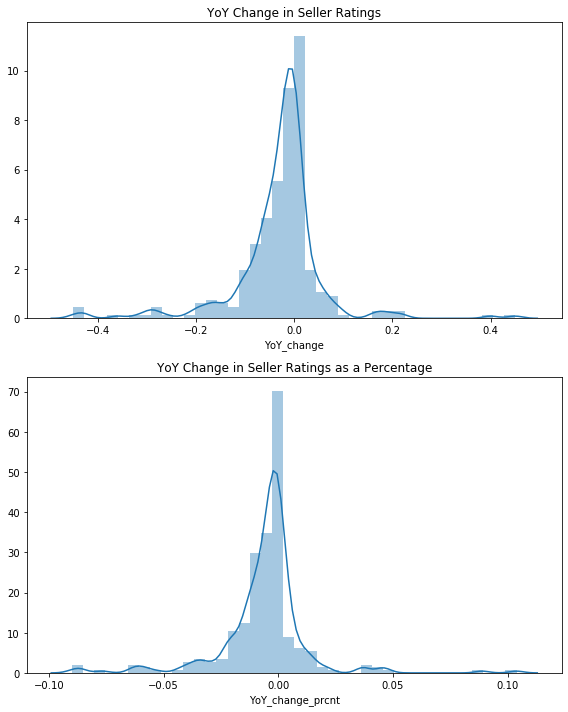

In [25]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))

sns.distplot(sellers_intersect_df['YoY_change'], bins= 40, ax=ax1)
ax1.set_title('YoY Change in Seller Ratings')

sns.distplot(sellers_intersect_df['YoY_change_prcnt'], bins= 40, ax=ax2)
ax2.set_title('YoY Change in Seller Ratings as a Percentage')

plt.tight_layout();

In [35]:
threshold = 0.005

venders_improved = sellers_intersect_df[sellers_intersect_df['YoY_change_prcnt'] > threshold].sort_values(by='YoY_change_prcnt', ascending=False).copy()

print('# of Venders w/ YoY Change > {:.2%} is {}'.format(threshold, venders_improved.shape[0]))
print('\n')
venders_improved

# of Venders w/ YoY Change > 0.50% is 35




,name,2016_rating,2017_rating,YoY_change,YoY_change_prcnt
30,Qualitywhitee,4.33,4.78,0.45,0.103926
155,lyso,4.50,4.90,0.40,0.088889
197,New_demension,4.66,4.88,0.22,0.047210
172,rivaldealer77,4.17,4.36,0.19,0.045564
83,Budness,4.71,4.92,0.21,0.044586
66,LegitVendor,4.80,4.98,0.18,0.037500
10,rxwholesale,4.33,4.49,0.16,0.036952
255,cheapestmotherfucker,4.67,4.84,0.17,0.036403
269,Kounterfeit_King,4.17,4.26,0.09,0.021583
282,undergroundcoco,4.69,4.79,0.10,0.021322


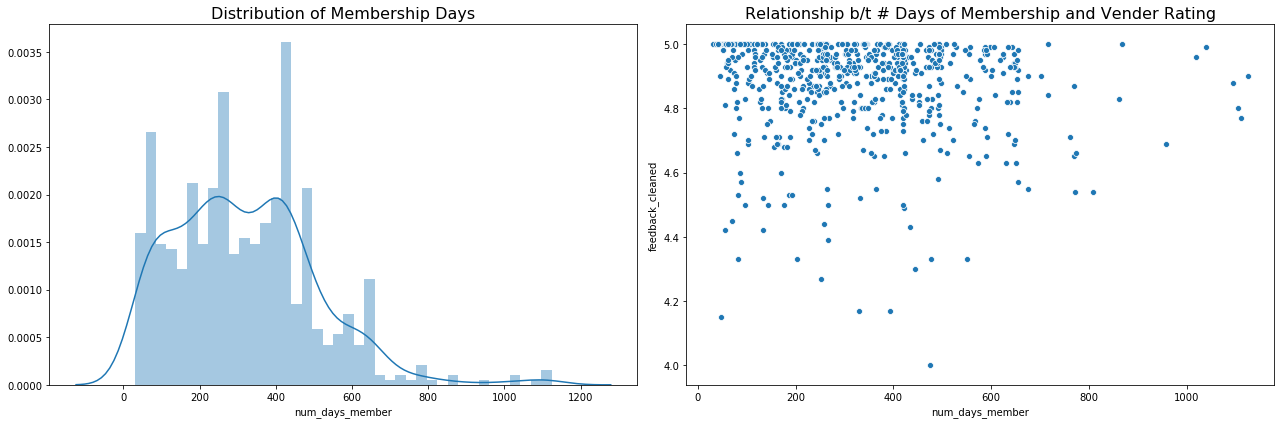

In [36]:
# 2016 data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.distplot(sellers16_v2['num_days_member'], bins= 40, ax=ax1)
ax1.set_title('Distribution of Membership Days', fontsize=16)

sns.scatterplot(x='num_days_member', y='feedback_cleaned', data=sellers16_v2, ax=ax2)
ax2.set_title('Relationship b/t # Days of Membership and Vender Rating', fontsize=16)

plt.tight_layout();

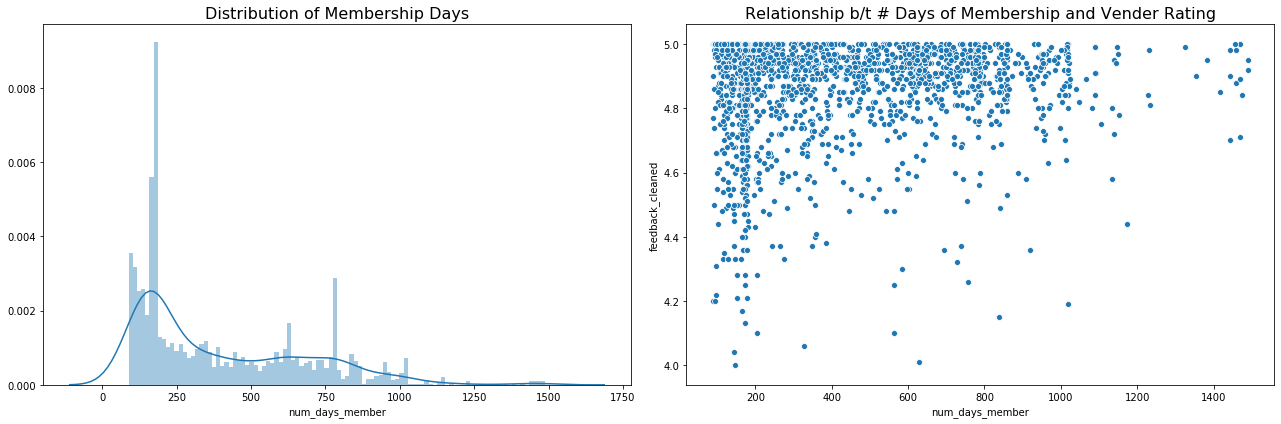

In [38]:
# 2017 data
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

sns.distplot(sellers17_v2['num_days_member'], bins= 100, ax=ax1)
ax1.set_title('Distribution of Membership Days', fontsize=16)

sns.scatterplot(x='num_days_member', y='feedback_cleaned', data=sellers17_v2, ax=ax2)
ax2.set_title('Relationship b/t # Days of Membership and Vender Rating', fontsize=16)

plt.tight_layout();